In [1]:
## Importing the Necessary Libraries:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Problem - Iphone purchase are getting increased day by day and many stores wants to predict whether a customer will purchase
an Iphone from their store .



This project model done by using KNN classifier 


# loading the Dataset

In [24]:
## loading the dataset
data = pd.read_csv("iphone_purchase_records.csv")
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# Performing Exploratory Data Analysis (EDA) 

In [54]:
## getting to know the shape of dataset
data.shape

(400, 4)

In [25]:
## Getting the overview of the dataset using head() and tail() function:

data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [26]:
data.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [10]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [27]:
## checking if the dataset has any null values:

data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [28]:
## converting the String data into Boolean value by using function called cat.codes

data['Gender'] = data['Gender'].astype('category')
data['Gender']= data['Gender'].cat.codes


In [29]:
data

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [30]:
data.describe()


,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [31]:
##Copying the dataset into other variable:
df = data.copy()
df

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
##  Doing the Graphical visualization for better understanding:

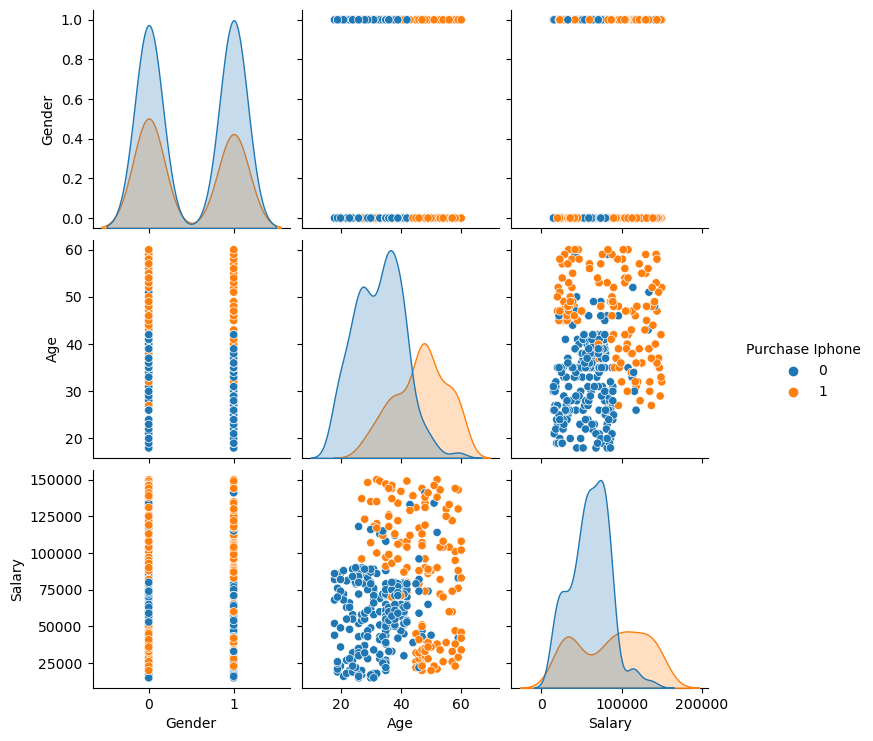

In [34]:
sns.pairplot(df, hue = 'Purchase Iphone', diag_kind= 'kde')

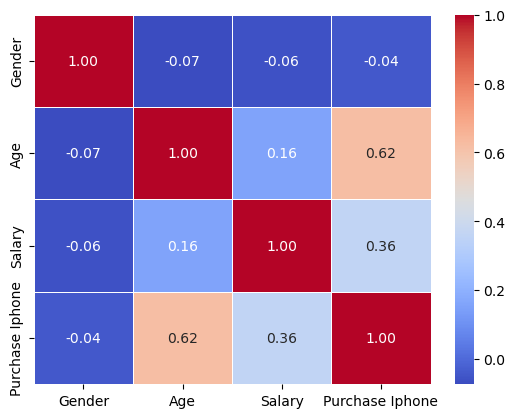

In [53]:
## visualizing the data with the help of Heatmap

corr_metrix = df.corr()
sns.heatmap(corr_metrix, annot = True, cmap ='coolwarm',fmt =".2f",linewidths = 0.5)
plt.show()

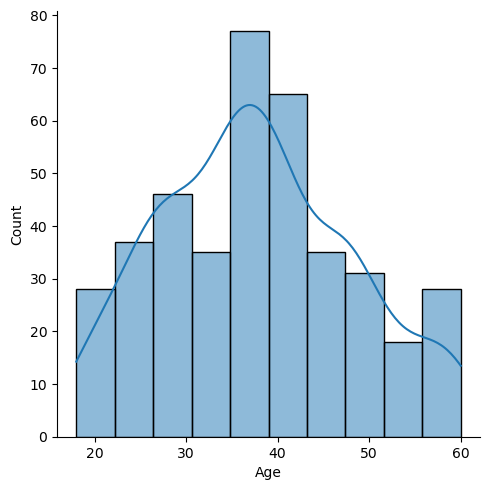

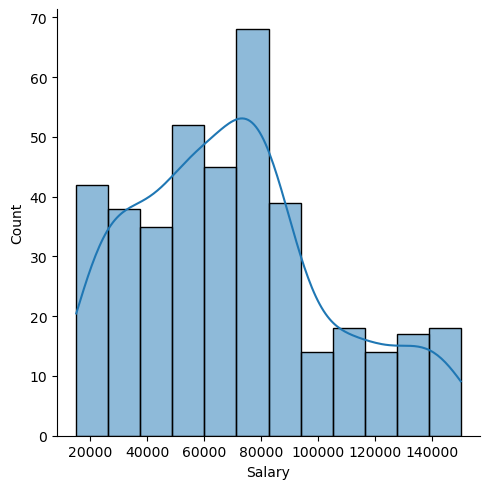

In [37]:
## data visuals 
sns.displot(df['Age'],kde=True)
sns.displot(df['Salary'],kde=True)


<Axes: xlabel='Purchase Iphone', ylabel='Salary'>

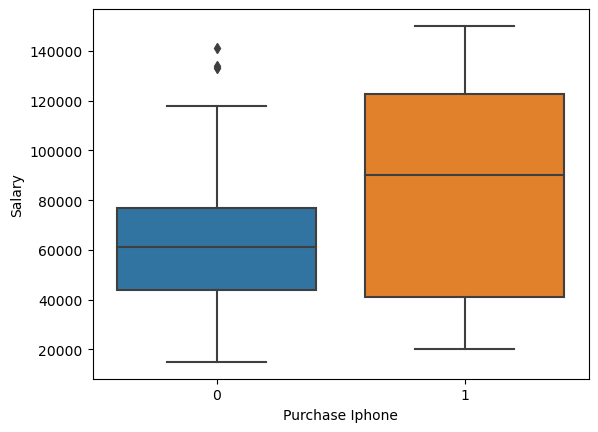

In [40]:
sns.boxplot(x='Purchase Iphone',y = 'Salary',data=df)

# Data processing

In [42]:
X = df[['Gender','Age','Salary']]
X

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [43]:
y = df['Purchase Iphone']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

# Spliting the data into train and Test

In [44]:


X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)


In [45]:
X_train.shape

(320, 3)

In [46]:
X_test.shape

(80, 3)

In [48]:
## standardize the feature:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model

In [58]:
## training the KNN model

knn = KNeighborsClassifier(n_neighbors=9)
knn_model = knn.fit(X_train,y_train)

# Prediction values

In [59]:
## Making the Predictions:
pred= knn.predict(X_test)
pred


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

# Checking the Accuracy of Model

In [60]:
accuracy = accuracy_score(y_test,pred)
print("the accuracy of the KNN Model is :",accuracy)

the accuracy of the KNN Model is : 0.9375


# Saving the Model

In [55]:
import joblib

In [61]:
filename = 'joblib_iphone_prj5.sav'
joblib.dump(knn_model,filename)

['joblib_iphone_prj5.sav']